# Visual Exploration

As we move into feature engineering, we will begin by visualizing the data to see if there are any interesting trends.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# retrieve data
merged = pd.read_csv('../../DataPlus/all_data_merged.csv')
va_original = pd.read_csv('../../DataPlus/data/VA_Original.csv')
dvd_original = pd.read_csv('../../DataPlus/data/DVD_Original.csv')

## Create Origin Dataset Variable

Creates variable for which study the patient came from

In [6]:
orig_data = []
for i in range(len(va_original.index)):
    orig_data.append("va")
for i in range(len(dvd_original.index)):
    orig_data.append("dvd")
merged['dataset'] = np.asarray(orig_data)

## Other Tools

In [21]:
# shows data in graphs in numerical form
def num_breakdown(df, group_var, hue_var):
    groups = df.groupby(group_var)
    
    # first groupby breakdown
    for name, group in groups:
        print('{}: '.format(str(name).upper()))
        for hue_name, hue_group in group.groupby(hue_var):
            percentage = round((len(hue_group.index) / len(group[hue_var].dropna().index)) * 100, 1)
            print('{} - {}%'.format(hue_name, percentage))
        print()

In [15]:
# prints the key for graph labels
def print_key(mapping):
    key = 'Key:\n' 
    for k, v in mapping.items():
        key += '{}: {}\n'.format(k, v)
    print(key)

## General

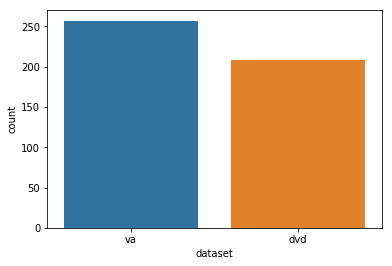

In [45]:
sns.countplot(x='dataset', data=merged)

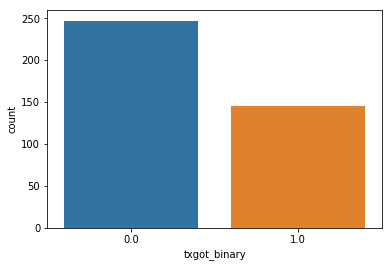

In [67]:
sns.countplot(x='txgot_binary', data=merged)

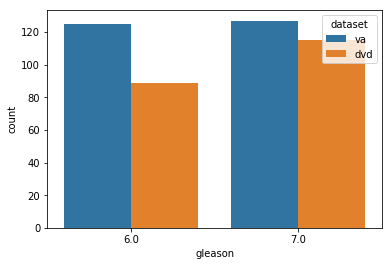

In [69]:
sns.countplot(x='gleason', data=merged, hue='dataset')

In [70]:
num_breakdown(merged, 'gleason', 'dataset')

6.0: 
dvd - 41.6%
va - 58.4%

7.0: 
dvd - 47.5%
va - 52.5%



## Age

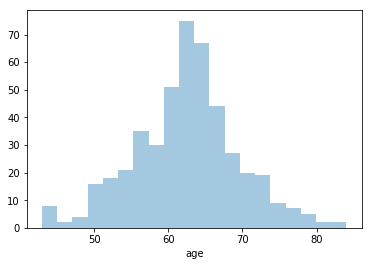

In [9]:
sns.distplot(merged['age'].dropna(), kde=False, bins=20)

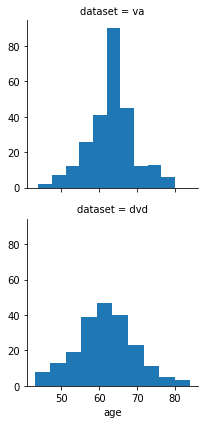

In [10]:
age_face = sns.FacetGrid(merged, row="dataset")
age_face = age_face.map(plt.hist, "age")

## Education

In [11]:
edu_map = {
    1: 'None', 2: 'Elementary',
    3: 'Some High School', 4: 'Complete High School',
    5: 'Trade School', 6: 'Some College', 7: "Associate's Degree",
    8: "Bachelor's Degree", 9: "Master's Degree", 10: "Doctoral/Professional Degree"
}

In [16]:
print_key(edu_map)

Key:
1: None
2: Elementary
3: Some High School
4: Complete High School
5: Trade School
6: Some College
7: Associate's Degree
8: Bachelor's Degree
9: Master's Degree
10: Doctoral/Professional Degree



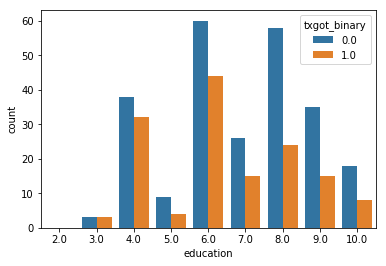

In [17]:
sns.countplot(x='education', data=merged, hue='txgot_binary')

In [22]:
num_breakdown(merged, 'education', 'txgot_binary')

2.0: 

3.0: 
0.0 - 50.0%
1.0 - 50.0%

4.0: 
0.0 - 54.3%
1.0 - 45.7%

5.0: 
0.0 - 69.2%
1.0 - 30.8%

6.0: 
0.0 - 57.7%
1.0 - 42.3%

7.0: 
0.0 - 63.4%
1.0 - 36.6%

8.0: 
0.0 - 70.7%
1.0 - 29.3%

9.0: 
0.0 - 70.0%
1.0 - 30.0%

10.0: 
0.0 - 69.2%
1.0 - 30.8%



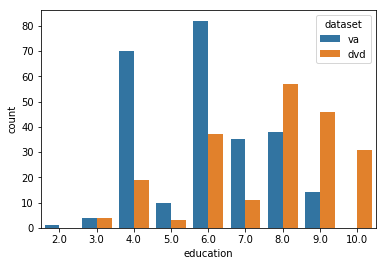

In [23]:
sns.countplot(x='education', data=merged, hue='dataset')

## Race

In [24]:
# combines race into one variable
def code_race(merged):
    new_col = []
    found_race = False
    for i in range(len(merged.index)):
        found_race = False
        for race in ['arabme', 'asian', 'black', 'hispanic', 'native', 'pacific', 'white', 'raceother']:
            if merged[race][i] == 1:
                new_col.append(race)
                found_race = True
                break
        if not found_race:
            new_col.append(np.nan)
    return new_col

In [25]:
merged['combined_race'] = code_race(merged)

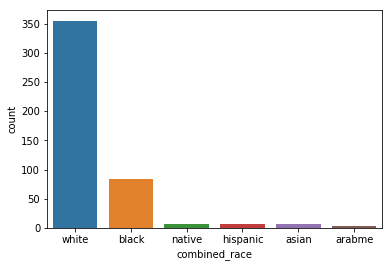

In [26]:
sns.countplot(x='combined_race', data=merged)

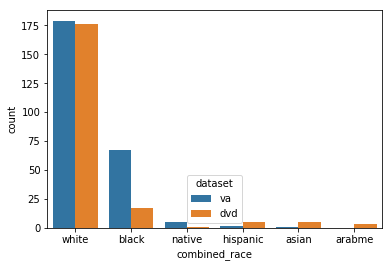

In [27]:
sns.countplot(x='combined_race', data=merged, hue='dataset')

In [28]:
# because minority is sparse, we create a binary caucasian variable
def white_coding(race_col):
    new_col = []
    for i in range(len(race_col.index)):
        if isinstance(race_col[i], str):
            if race_col[i] == 'white':
                new_col.append(1)
            else:
                new_col.append(0)
        else:
            new_col.append(np.nan)
    return np.asarray(new_col)

In [29]:
merged['white_binary'] = white_coding(merged['combined_race'])

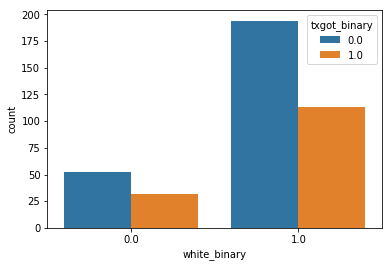

In [30]:
sns.countplot(x='white_binary', data=merged, hue='txgot_binary')

In [31]:
num_breakdown(merged, 'white_binary', 'txgot_binary')

0.0: 
0.0 - 61.9%
1.0 - 38.1%

1.0: 
0.0 - 63.2%
1.0 - 36.8%



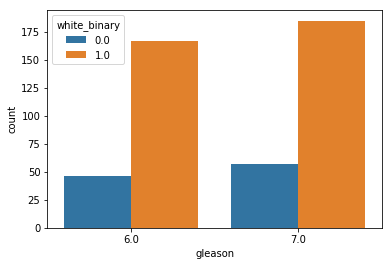

In [32]:
sns.countplot(x='gleason', data=merged, hue='white_binary')

In [33]:
num_breakdown(merged, 'gleason', 'white_binary')

6.0: 
0.0 - 21.6%
1.0 - 78.4%

7.0: 
0.0 - 23.6%
1.0 - 76.4%



## Relationship Status

In [34]:
marry_map = {
    1: 'Married', 2: 'Widowed', 3: 'Divorced', 4: 'Separated from Spouse',
    5: 'Never Married'
}

In [35]:
print_key(marry_map)

Key:
1: Married
2: Widowed
3: Divorced
4: Separated from Spouse
5: Never Married



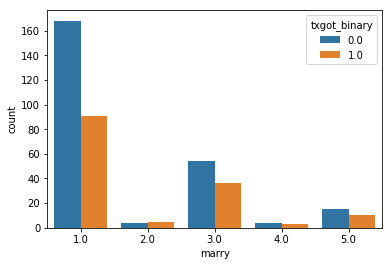

In [36]:
sns.countplot(x='marry', data=merged, hue='txgot_binary')

In [37]:
num_breakdown(merged, 'marry', 'txgot_binary')

1.0: 
0.0 - 64.9%
1.0 - 35.1%

2.0: 
0.0 - 44.4%
1.0 - 55.6%

3.0: 
0.0 - 60.0%
1.0 - 40.0%

4.0: 
0.0 - 57.1%
1.0 - 42.9%

5.0: 
0.0 - 60.0%
1.0 - 40.0%



## Origin Dataset

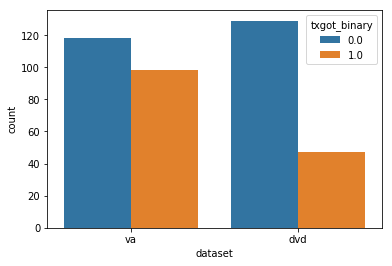

In [38]:
sns.countplot(x='dataset', data=merged, hue='txgot_binary')

In [39]:
num_breakdown(merged, 'dataset', 'txgot_binary')

DVD: 
0.0 - 73.3%
1.0 - 26.7%

VA: 
0.0 - 54.6%
1.0 - 45.4%



Very different result than when we used our custom-made active_surv variable. It seems that patients in VA had a bigger discrepancy between what they first decided and what they ultimately received.

## MD Respect

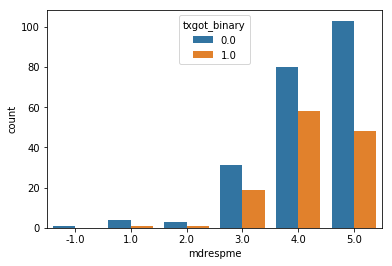

In [47]:
sns.countplot(x='mdrespme', data=merged, hue='txgot_binary')

In [49]:
num_breakdown(merged, 'mdrespme', 'txgot_binary')

-1.0: 
0.0 - 100.0%

1.0: 
0.0 - 80.0%
1.0 - 20.0%

2.0: 
0.0 - 75.0%
1.0 - 25.0%

3.0: 
0.0 - 62.0%
1.0 - 38.0%

4.0: 
0.0 - 58.0%
1.0 - 42.0%

5.0: 
0.0 - 68.2%
1.0 - 31.8%



## Performance on Text Classification

In [50]:
import pickle

In [56]:
text_df = pickle.load(open('dec_dataframe.p', 'rb'))

In [57]:
dataset_df = merged[['dataset', 'ID']]

In [59]:
text_df = pd.merge(text_df, dataset_df, on=['ID']).dropna(subset=['decision_values'])

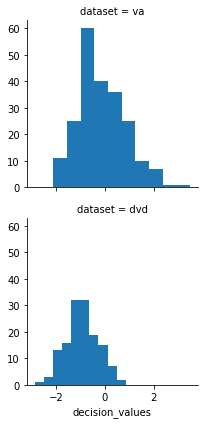

In [62]:
text_face = sns.FacetGrid(text_df, row="dataset")
text_face = text_face.map(plt.hist, "decision_values")

## Saving Dataframe with Added Features

In [63]:
import pickle

In [66]:
# pickle.dump(merged, open('added_feats.p', 'wb'))